In [62]:
"""
Курсовой проект
Линейная регресия
Использован Датасет https://www.kaggle.com/zakriarehman/weather-data-for-linear-regression?select=weather.csv
Целевая переменная : Видимость

"""

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler




#DATASET_PATH = https://www.kaggle.com/zakriarehman/weather-data-for-linear-regression?select=weather.csv


DATASET_PATH = '/home/orangepi/Downloads/weather.csv'
dataset = pd.read_csv(DATASET_PATH, sep = ',')

In [64]:

target = dataset ['Visibility_km']
data = pd.DataFrame(dataset ,columns = ['Temperature_c', 'Humidity', 'Wind_Speed_kmh', 'Pressure_millibars', 'Rain'])

In [73]:
data.head(10)

,Temperature_c,Humidity,Wind_Speed_kmh,Pressure_millibars,Rain
0,-0.555556,0.92,11.2700,1021.60,0
1,21.111111,0.73,20.9300,1017.00,1
2,16.600000,0.97,5.9731,1013.99,1
3,1.600000,0.82,3.2200,1031.59,1
4,2.194444,0.60,10.8836,1020.88,1
5,27.538889,0.32,21.4613,1015.33,1
6,19.977778,0.84,7.9695,1009.04,1
7,11.111111,0.86,14.4900,1009.60,1
8,8.405556,0.73,14.0070,1018.39,1
9,1.700000,0.81,6.4400,1003.89,1


In [74]:
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size= 0.25)

In [77]:
model = LinearRegression()#.t(fiX_train,y_train)

In [81]:
model.fit(X_train,y_train)

LinearRegression()

Метрика

In [80]:
y_predict = model.predict(X_test)
y_predict.shape

check_test = pd.DataFrame({
    'y_test':y_test,
    'y_pred': y_predict.flatten(),
})
check_test['error'] = check_test['y_pred'] - check_test['y_test']
mse = (check_test['error']**2).mean()
absolut = (np.abs(check_test['error'])).mean()
print(mse)
print(absolut)

13.92360011218714
3.075997865144933


#Запуск данных в обученную модель

In [39]:
X_predict = model.predict(X_train)

In [40]:
check_test2 = pd.DataFrame({
    'y_test':y_train,
    'x_pred': X_predict.flatten(),
})
check_test2['error'] = check_test2['x_pred'] - check_test2['y_test']
mse2 = (check_test2['error']**2).mean()
absolut2 = (np.abs(check_test2['error'])).mean()
print(mse2)
print(absolut2)

13.994092254532005
3.0640836827538425


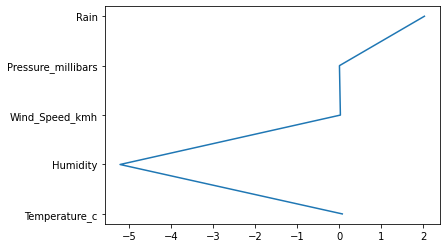

In [42]:
pyplot.plot(model.coef_, ['Temperature_c', 'Humidity', 'Wind_Speed_kmh', 'Pressure_millibars', 'Rain'])

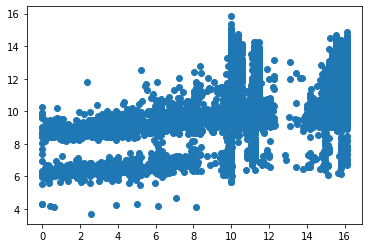

In [83]:
pyplot.scatter(check_test2['y_test'],check_test2['x_pred'])

In [96]:
Scaler = MinMaxScaler()
stx = Scaler.fit_transform(X_train)
X_trsc = pd.DataFrame(stx, columns = ['Temperature_c', 'Humidity', 'Wind_Speed_kmh', 'Pressure_millibars', 'Rain'])

Стандартизировал

In [97]:
model.fit(X_trsc,y_train)
X_predict2 = model.predict(X_trsc)

13.994092254532005
3.043574371745901


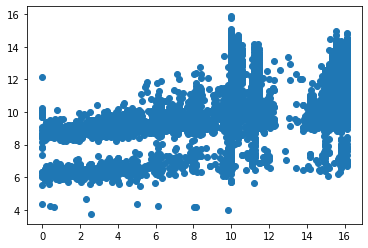

In [101]:
check_test3 = pd.DataFrame({
    'y_test':y_train,
    'x_pred': X_predict2.flatten(),
})
check_test3['error'] = check_test3['x_pred'] - check_test3['y_test']
mse3 = (check_test2['error']**2).mean()
absolut3 = (np.abs(check_test3['error'])).mean()
print(mse3)
print(absolut3)
pyplot.scatter(check_test3['y_test'],check_test3['x_pred'])

Вывод: Прогнозирование "Видимости" возможно при условии разделения видимости на три параметра: Min Middle Max
Данная модель использована для проверки Линейной регрессии для данного датасета,результат: Не применимо.
К сожалению другие модели еще не освоены.
